# Лабораторная работа №2. Дискретные LTI системы.

## Вариант №6

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [37]:
M = 4
x = np.ones(M)
h = np.ones(M)

def my_convolve(x, h):  
    n1 = x.size
    n2 = h.size
    y = np.zeros(n1 + n2 - 1)
    for k in range(y.size):
        y[k] = 0
        
        kmin = k - n1 + 1 if k >= n1 - 1 else 0
        kmax = k if (k < n2 - 1) else n2 - 1
        
        for m in range(kmin, kmax + 1):
            y[k] += x[m] * h[k - m]          
    return y

np.allclose(my_convolve(x, h), signal.convolve(x, h, method = 'direct'), signal.convolve(x, h, method = 'fft'))

True

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [38]:
N = 2**18
n_0 = 1024
k = np.arange(N)
x = np.cos(2 * np.pi * k * n_0/N)
h = np.sin(2 * np.pi * k * n_0/N)

def measure_convolve_time(method: str, x: np.ndarray, h: np.ndarray):
    start = time.time()
    signal.convolve(x, h, method=method)
    end = time.time()
    print(f"scipy {method} conv1d: {end - start}")

measure_convolve_time(method='direct', x=x, h=h)
measure_convolve_time(method='fft', x=x, h=h)


scipy direct conv1d: 7.873504877090454
scipy fft conv1d: 0.03881478309631348


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

$$
\mathcal{H}(\nu)=\sum \limits_{k=-\infty}^{\infty} h[k] \exp (-j 2 \pi k \nu)=\dfrac{1}{M} \sum_{k=0}^{M-1} \exp (-j 2\pi k \nu) = 
=\dfrac{1}{M} \dfrac{1-\exp (-j 2 \pi \nu M)}{1-\exp (-j 2 \pi \nu)}=\dfrac{1}{M} \dfrac{2 j}{2 j} \dfrac{e^{-j \pi \nu M}}{e^{-j \pi \nu}} \dfrac{\left(e^{+j \pi \nu M}-e^{-j \pi \nu M}\right)}{\left(e^{+j \pi \nu}-e^{-j \pi \nu}\right)}=\dfrac{1}{M} \dfrac{\sin (M \pi \nu)}{\sin (\pi \nu)} \exp (-j(M-1) \pi \nu).
$$

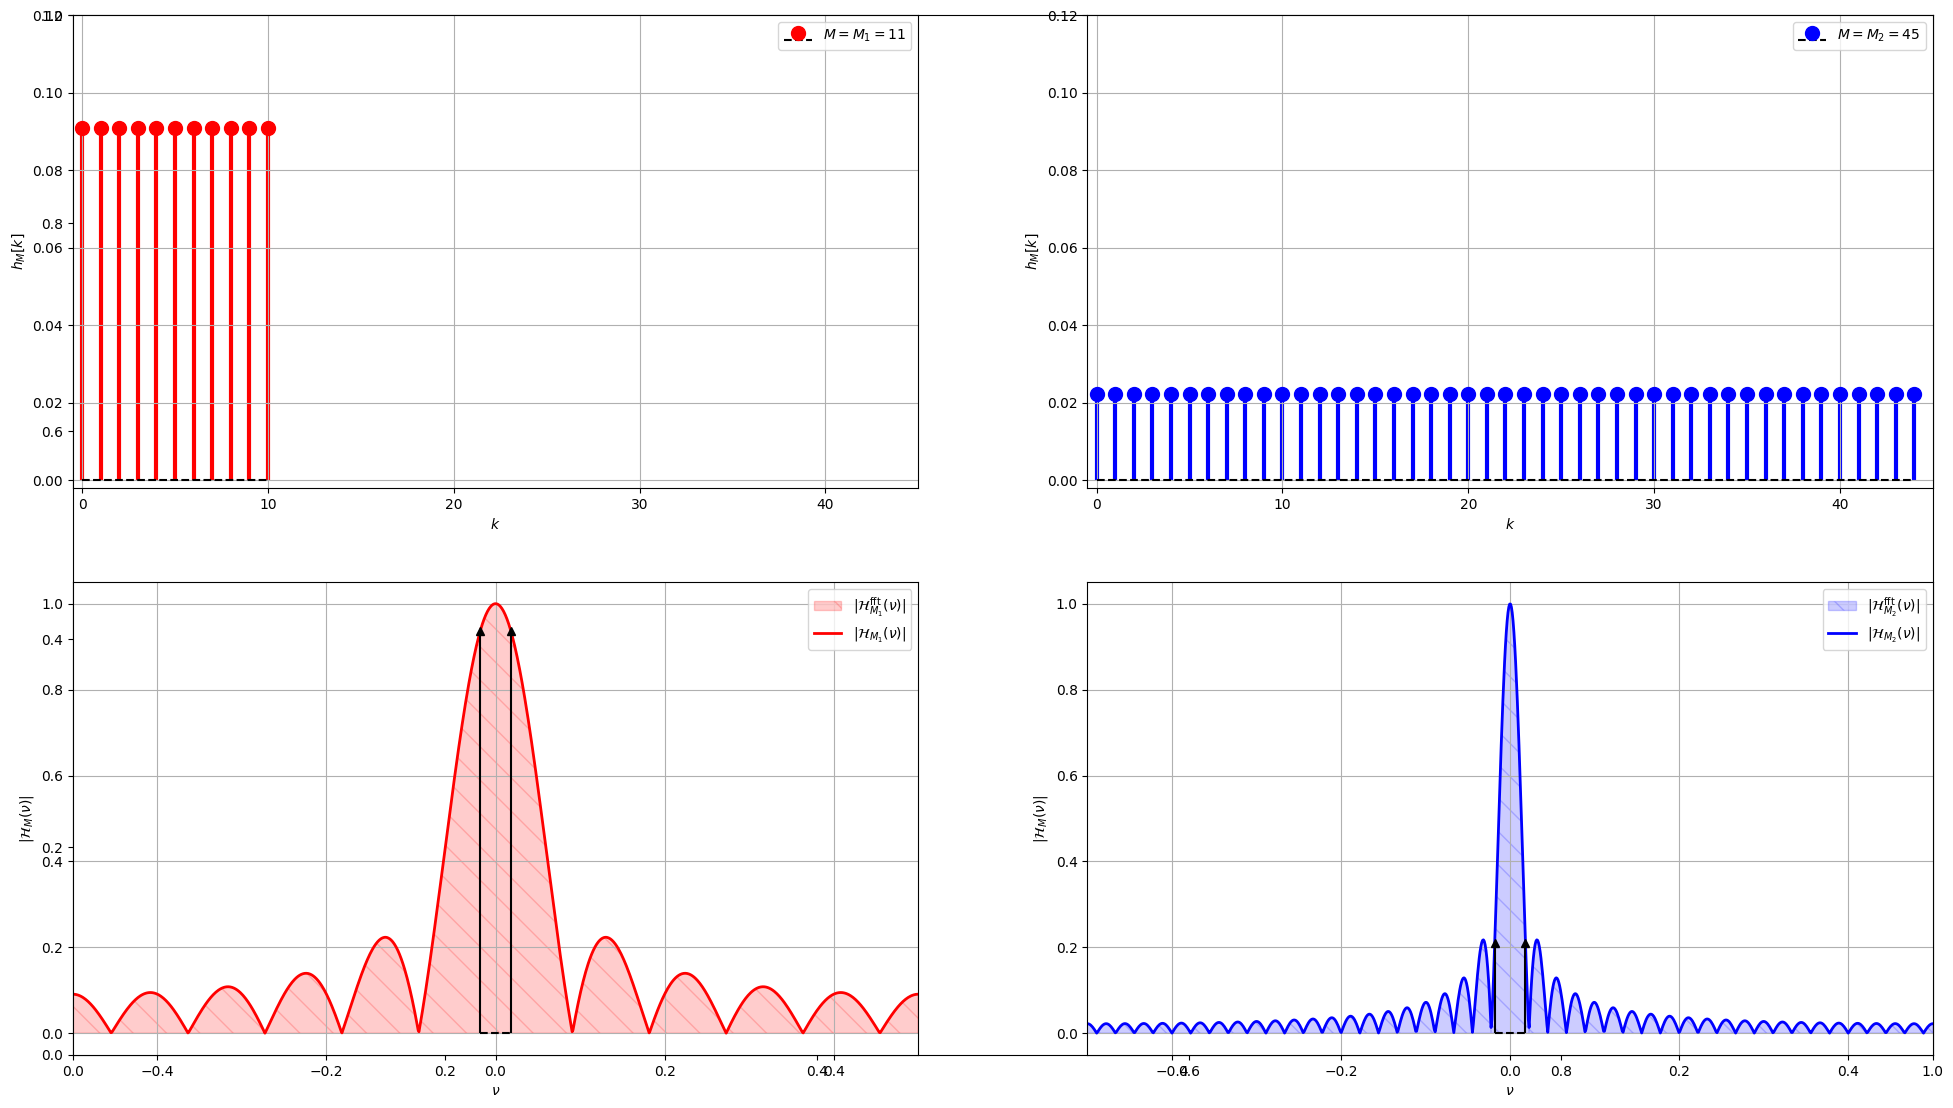

In [39]:
M_1 = 11
M_2 = 45
K = 55
N = 115

@np.vectorize
def custom_DTFT(tick, M):
    return np.abs(np.sin(M * np.pi * tick) / np.sin(np.pi * tick) / M)

def DTFT_abs(x, M = 2**13):
    return (-0.5+(np.arange(M)/M), 
            abs(np.fft.fftshift(np.fft.fft(x, M))))

nu = np.linspace(-0.5, 0.5, 1000)


h_1 = np.ones(M_1)/M_1
h_2 = np.ones(M_2)/M_2


fig, ax = plt.subplots(figsize=(24, 13.5))
plt.subplot(221)
ml, sl, bl = plt.stem(np.arange(M_1), h_1, 'r', basefmt = 'k--', markerfmt = 'ro', label = '$M = M_1 = {}$'.format(M_1))
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xlim(-0.5, M_2)
plt.ylim(-0.002, 0.12)
#plt.xticks(np.arange(M_1))
plt.ylabel('$h_{M}[k]$')
plt.xlabel('$k$')
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(222)
ml, sl, bl = plt.stem(np.arange(M_2), h_2, 'b', basefmt = 'k--', markerfmt = 'bo', label = '$M = M_2 = {}$'.format(M_2))
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
#plt.xticks(np.arange(M_2))
plt.xlim(-0.5, M_2)
plt.ylim(-0.002, 0.12)
plt.ylabel('$h_{M}[k]$')
plt.xlabel('$k$')
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(223)
plt.fill_between(DTFT_abs(h_1)[0], DTFT_abs(h_1)[1], color = 'red', alpha = 0.2, label = '$|\mathcal{H}_{M_1}^{\\text{fft}}(\\nu)|$', hatch = '\\')
plt.plot(nu, custom_DTFT(nu, M_1), 'r', lw = 2, label = '$|\mathcal{H}_{M_1}(\\nu)|$')
plt.stem([-1/K, 1/K], [custom_DTFT(-1/K, M_1), custom_DTFT(1/K, M_1)], 'k', basefmt = 'k--', markerfmt = 'k^')
plt.xlim(-0.5, 0.5)
plt.ylabel('$|\mathcal{H}_{M}(\\nu)|$')
plt.xlabel('$\\nu$')
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(224)
plt.fill_between(DTFT_abs(h_2)[0], DTFT_abs(h_2)[1], color = 'blue', alpha = 0.2, label = '$|\mathcal{H}_{M_2}^{\\text{fft}}(\\nu)|$', hatch = '\\')
plt.plot(nu, custom_DTFT(nu, M_2), 'b', lw = 2, label = '$|\mathcal{H}_{M_2}(\\nu)|$')
plt.stem([-1/K, 1/K], [custom_DTFT(-1/K, M_2), custom_DTFT(1/K, M_2)], 'k', basefmt = 'k--', markerfmt = 'k^')
plt.xlim(-0.5, 0.5)
plt.ylabel('$|\mathcal{H}_{M}(\\nu)|$')
plt.xlabel('$\\nu$')
plt.legend(loc = 'upper right')
plt.grid()

plt.show()

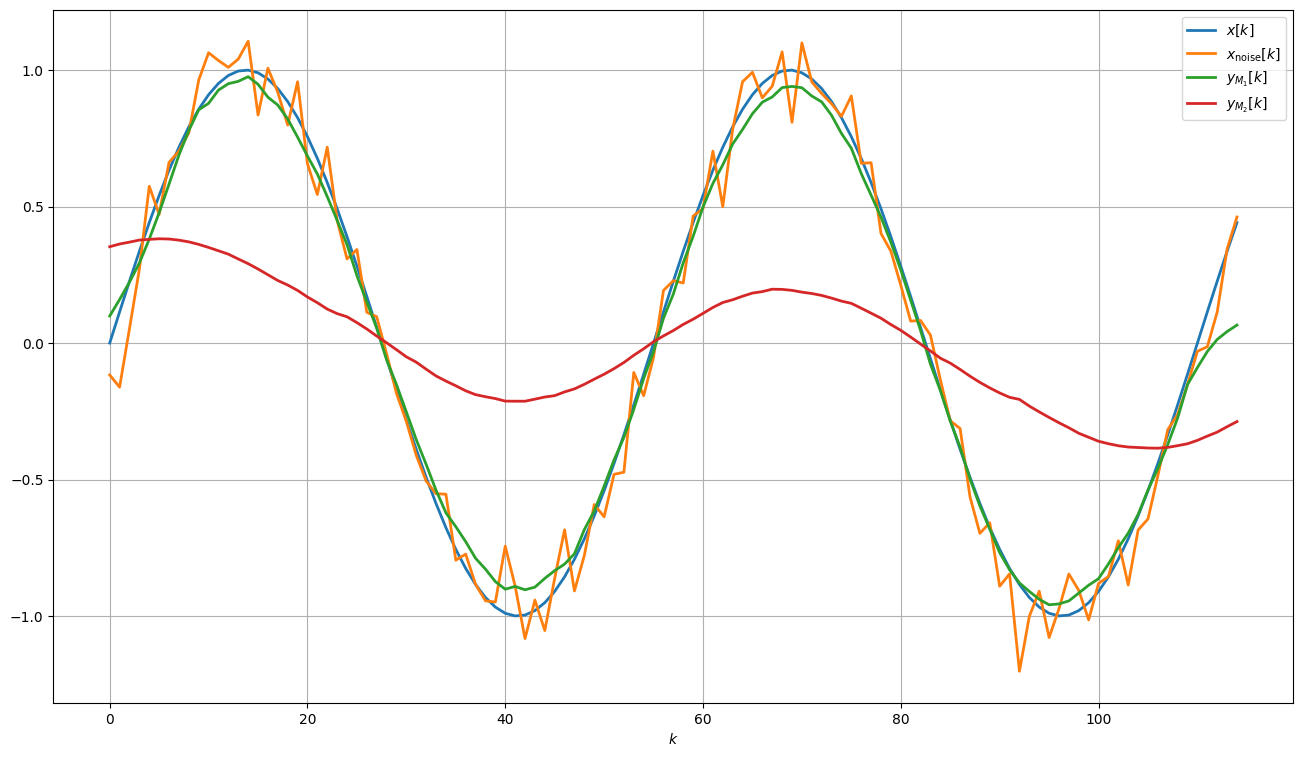

In [40]:
k = np.arange(N)
x = np.sin(2*np.pi * k/K)
x_noise = x + np.random.normal(0, 0.1, N)

fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(x, lw = 2, label = '$x[k]$')
plt.plot(x_noise, lw = 2, label = '$x_{\\text{noise}}[k]$')
plt.plot(signal.convolve(x_noise, h_1, mode = 'same'), lw = 2, label = '$y_{M_1}[k]$')
plt.plot(signal.convolve(x_noise, h_2, mode = 'same'), lw = 2, label = '$y_{M_2}[k]$')
plt.xlabel('$k$')
plt.legend()
plt.grid()
plt.show()

В первую очередь можно отметить зависимость ошибки в "начале¨" и "конце¨" сигнала: чем больше $M$, тем больше отсчётов нужно фильтру, чтобы "сойтись" к исходному сигналу и перестать реагировать на искусственные нули.

Также отмечу, что данный фильтр эффективно работает, когда рабочие частоты (например, синуса) попадают в главный лепесток недалеко от нуля для меньшего искажения амплитуды (хотя это можно довольно легко компенсировать, если только M не кратно K). Так, мы видим, что в случае $M_2$ сигнал сильно затухает. Этот эффект можно объяснить как в частотной области (см. картинку, спектральная характеристика затухает, т.к. импульсная характеристика конечна), так и в сопряжённом пространстве времени (чем больше M, тем больший участок периода мы усредняем, то есть тем ближе к нулю среднее, как за счёт компенсации осцилляций, так и за счёт нормировки на $M$).

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [41]:
a = 1.
b = 0.6
c = 0.3
M = 50
N = 220

def cascade(x, h_inner, h_outer):
    return signal.convolve(h_outer, (signal.convolve(h_inner, x)))

h_1 = np.zeros(3*M)
h_1[0] = a/(a + b + c)
h_1[M] = b/(a + b + c)
h_1[2*M] = c/(a + b + c)

h_2 = np.array([0.5, 0.5])

x = np.random.rand(N) * 2 - 1 # random from -1 to +1

np.allclose(cascade(x, h_1, h_2), cascade(x, h_2, h_1))

True

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

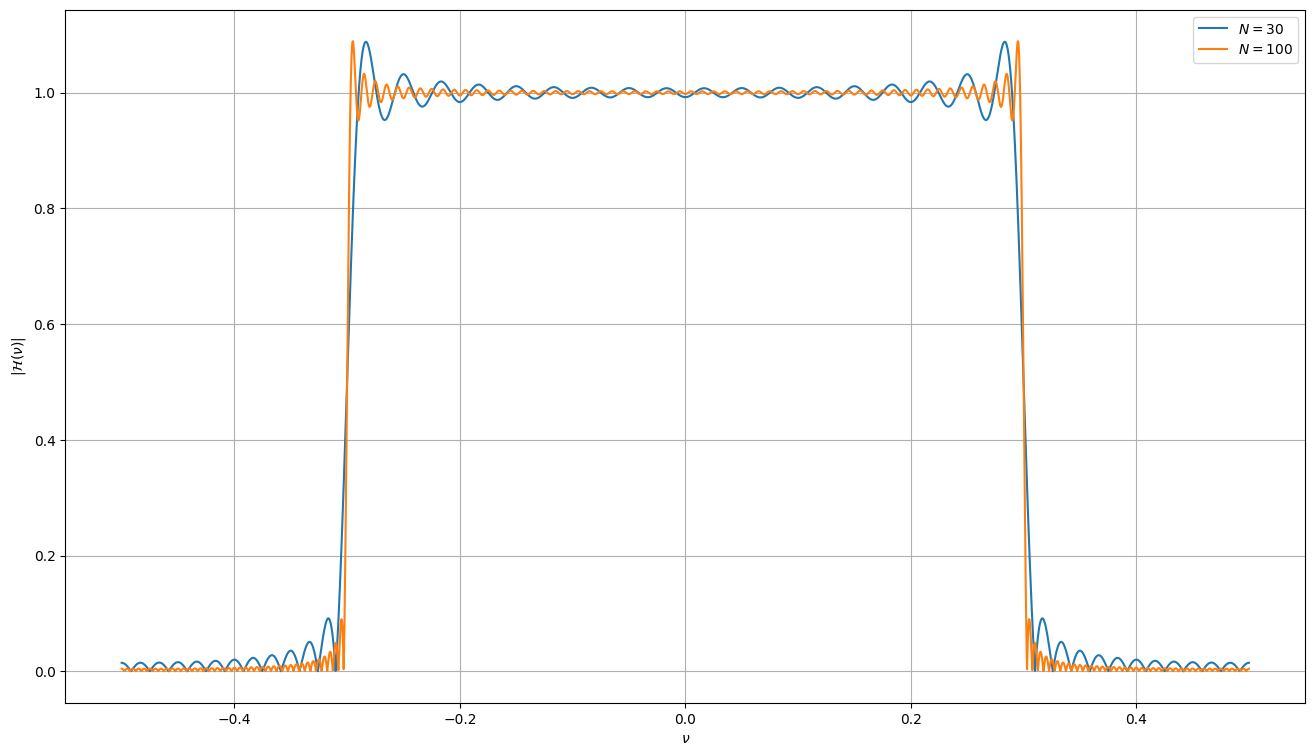

In [42]:
nu_c = 0.3
N = 20

def DTFT_abs(x, M = 2**13):
    return (-0.5+(np.arange(M)/M), 
            abs(np.fft.fftshift(np.fft.fft(x, M))))

@np.vectorize
def wrapper(tick):
    if tick:
        return np.sin(2.*np.pi*nu_c*tick)/np.pi/tick
    else:
        return 2*nu_c

def impulse_response(N):
    k = np.arange(2*N)
    return wrapper(k - N)

fig, ax = plt.subplots(figsize=(16, 9))

for N in [30, 100]:
    plt.plot(DTFT_abs(impulse_response(N))[0], DTFT_abs(impulse_response(N))[1], label = f"$N = {N}$")
    
plt.ylabel('$|\mathcal{H}(\\nu)|$')
plt.xlabel('$\\nu$')
plt.legend()
plt.grid()

plt.show()

При увеличении $N$ при фиксированной $\nu_c$ частота осцилляций увеличивается, а их ширина снижается, однако их максимальная амплитуда остаётся постоянной.

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [43]:
import numpy as np
import matplotlib.pyplot as plt 

variant = 6

nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
def H_val(nu, n):
    return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0

def task_3_2(variant):
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

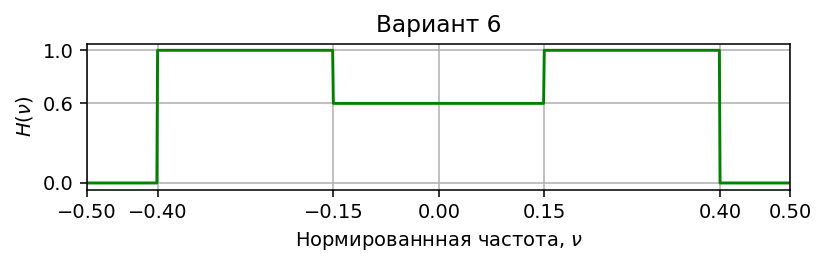

In [44]:
# For 6th variant:
task_3_2(variant=variant)

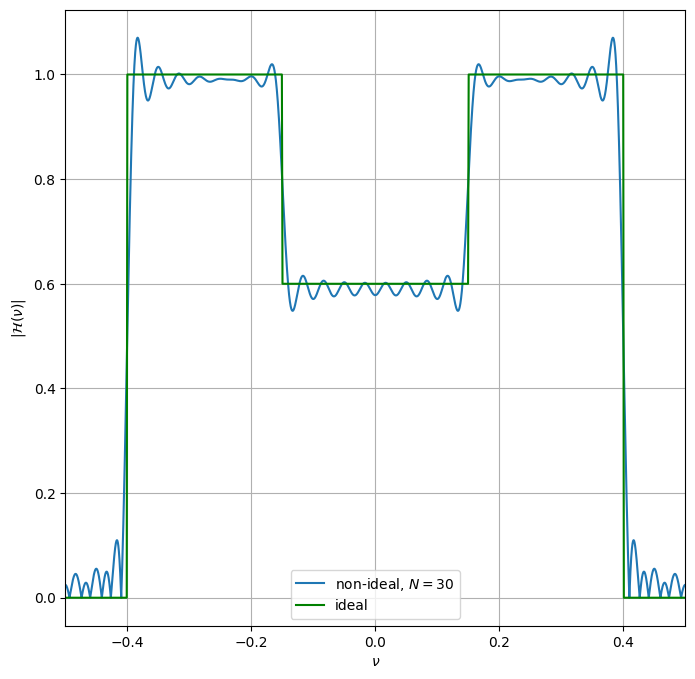

In [67]:
N = 30

def DTFT_abs(x, M = 2**13):
    return (-0.5+(np.arange(M)/M), 
            abs(np.fft.fftshift(np.fft.fft(x, M))))

@np.vectorize
def impulse_response(tick):
    if tick:
        return (1.*np.sin(2.*np.pi*0.4*tick) - 0.4*np.sin(2.*np.pi*0.15*tick)) / (np.pi*tick)
    else:
        return 1.*1. - 4*0.55*0.15

h = impulse_response(np.arange(2*N) - N)

fig, ax = plt.subplots(figsize=(8, 8))


plt.plot(DTFT_abs(h)[0], DTFT_abs(h)[1], label = f"non-ideal, $N = {N}$")
H0 = [H_val(x, variant-1) for x in np.linspace(-0.5, 0.5, 1000)]
plt.plot(nu, H0,'g-',  label = f"ideal")
plt.ylabel('$|\mathcal{H}(\\nu)|$')
plt.xlabel('$\\nu$')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.grid()

plt.show()
